In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch_geometric.data import Data

# Define your sample directory
sample_dir = 'prepared_samples'  # Adjust this path as needed

# Function to load features from a sample file
def load_features(path):
    sample = torch.load(path)
    mol_data = sample[0]
    pro_data = sample[1]
    
    # Convert dictionaries to Data objects if necessary
    if isinstance(mol_data, dict):
        mol_data = Data(**mol_data)
    if isinstance(pro_data, dict):
        pro_data = Data(**pro_data)
    
    # Ensure 'x' attribute is set for both molecule and protein data
    if not hasattr(mol_data, 'x') or mol_data.x is None:
        if hasattr(mol_data, 'features'):
            mol_data.x = mol_data.features
        else:
            raise ValueError(f"Sample at {path} mol_data has no 'x' or 'features' attribute.")
    if not hasattr(pro_data, 'x') or pro_data.x is None:
        if hasattr(pro_data, 'features'):
            pro_data.x = pro_data.features
        else:
            raise ValueError(f"Sample at {path} pro_data has no 'x' or 'features' attribute.")
    
    # Convert features to numpy if they're in tensor format
    mol_features = mol_data.x if isinstance(mol_data.x, np.ndarray) else mol_data.x.numpy()
    pro_features = pro_data.x if isinstance(pro_data.x, np.ndarray) else pro_data.x.numpy()
    
    return mol_features, pro_features

# Function to visualize the distributions of molecule and protein features
def visualize_feature_distributions(sample_files, sample_dir):
    all_mol_features = []
    all_pro_features = []
    
    for file_name in sample_files:
        sample_path = os.path.join(sample_dir, file_name)
        mol_features, pro_features = load_features(sample_path)
        
        all_mol_features.extend(mol_features.ravel())  # Flatten and add to list
        all_pro_features.extend(pro_features.ravel())  # Flatten and add to list
    
    # Plot the distributions
    plt.figure(figsize=(14, 6))
    
    # Molecule features distribution
    plt.subplot(1, 2, 1)
    sns.histplot(all_mol_features, bins=50, kde=True)
    plt.title("Molecule Feature Distribution")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    
    # Protein features distribution
    plt.subplot(1, 2, 2)
    sns.histplot(all_pro_features, bins=50, kde=True)
    plt.title("Protein Feature Distribution")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

# Load the sample files and visualize distributions
sample_files = [f for f in os.listdir(sample_dir) if f.endswith('.pt')]
visualize_feature_distributions(sample_files, sample_dir)



<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


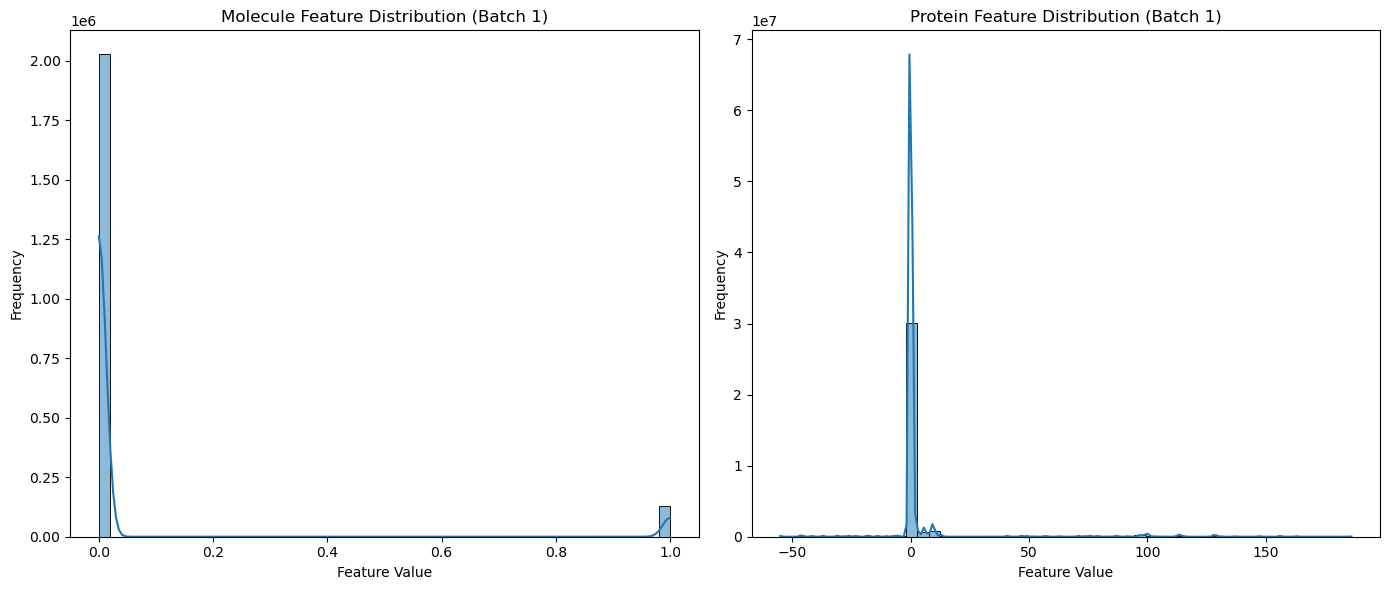

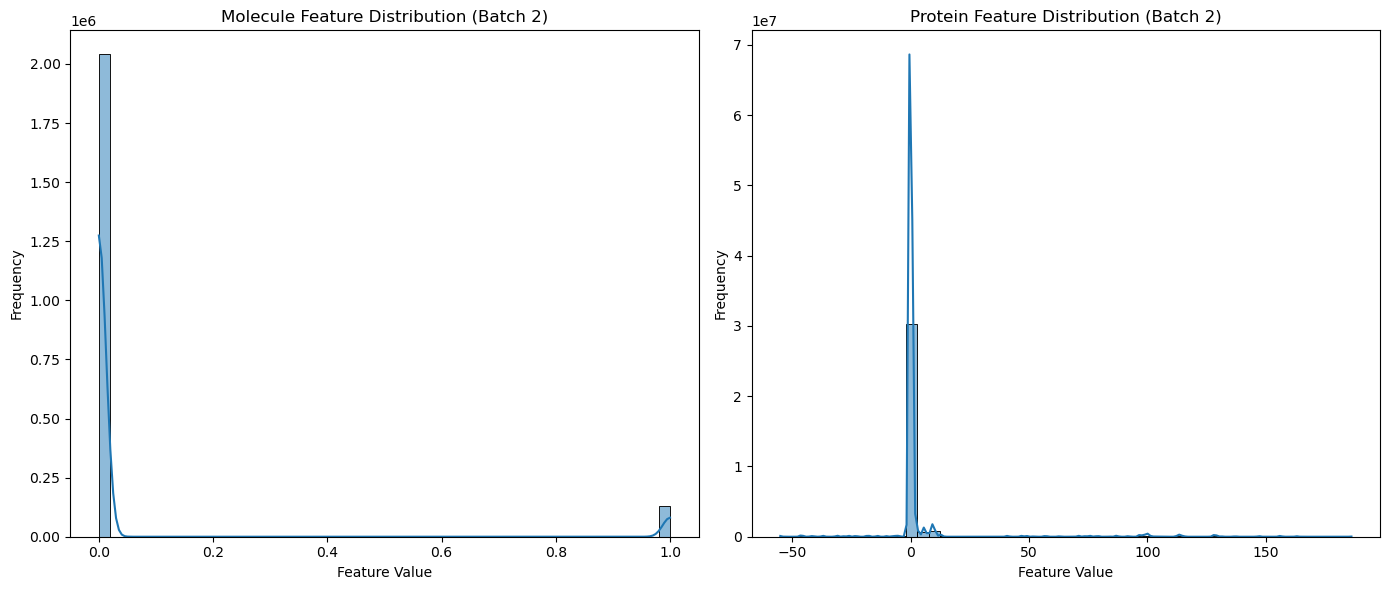

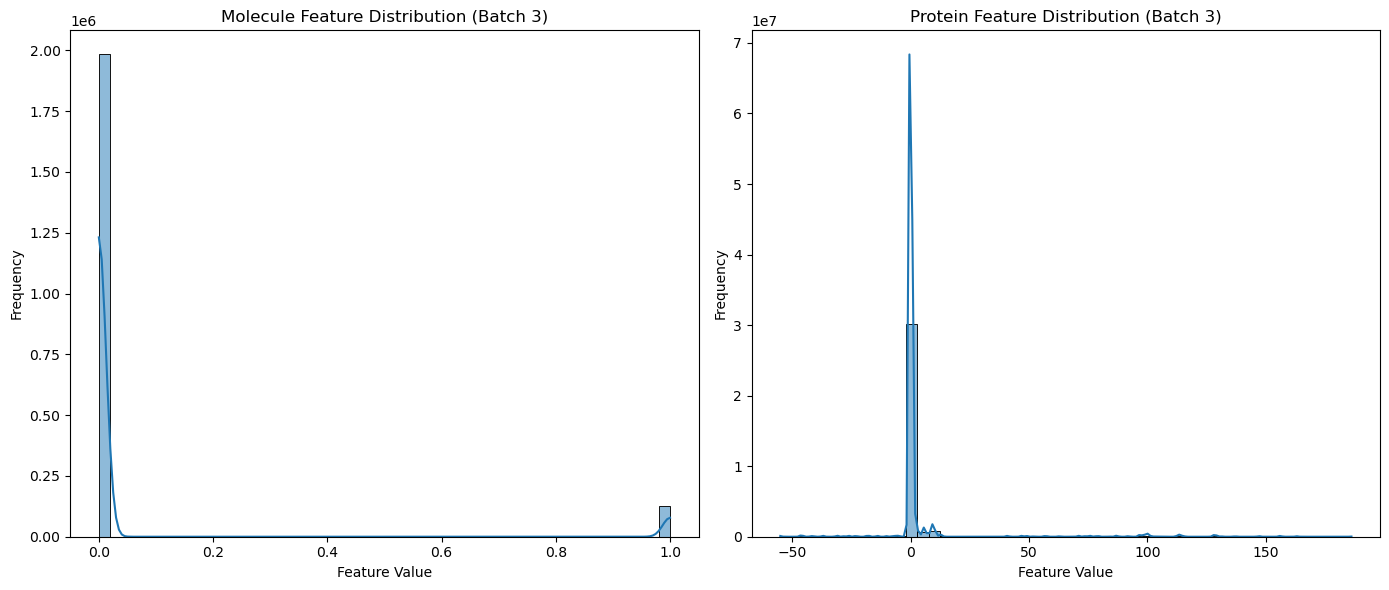

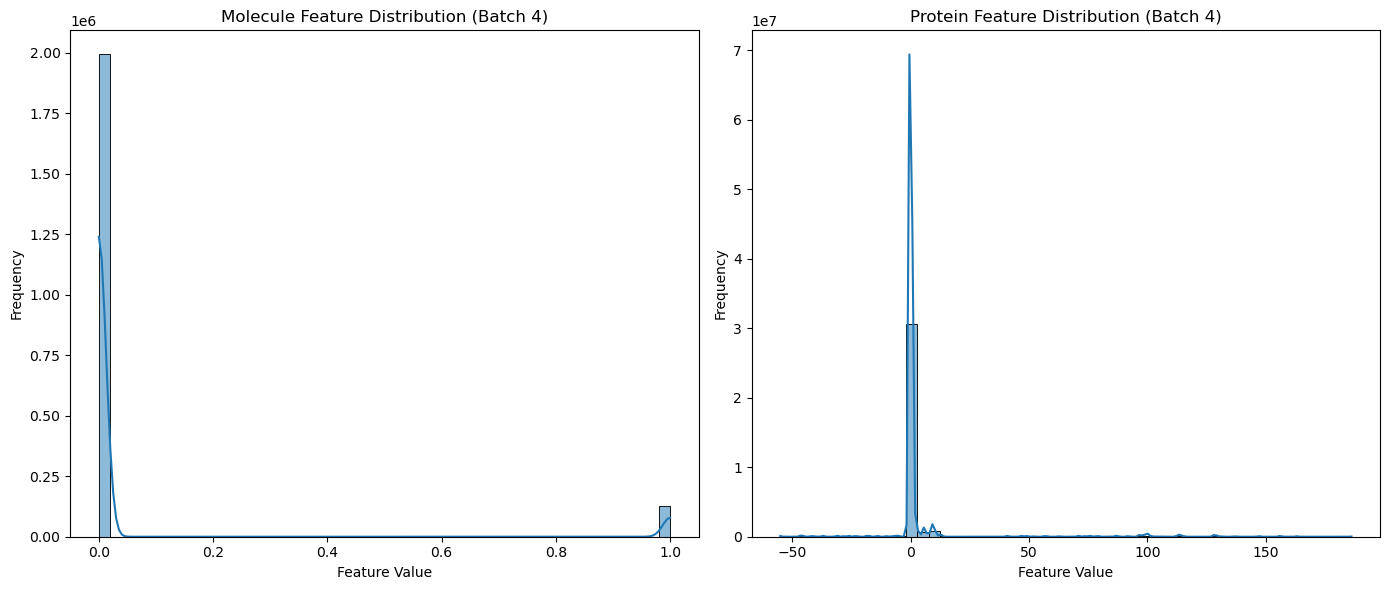

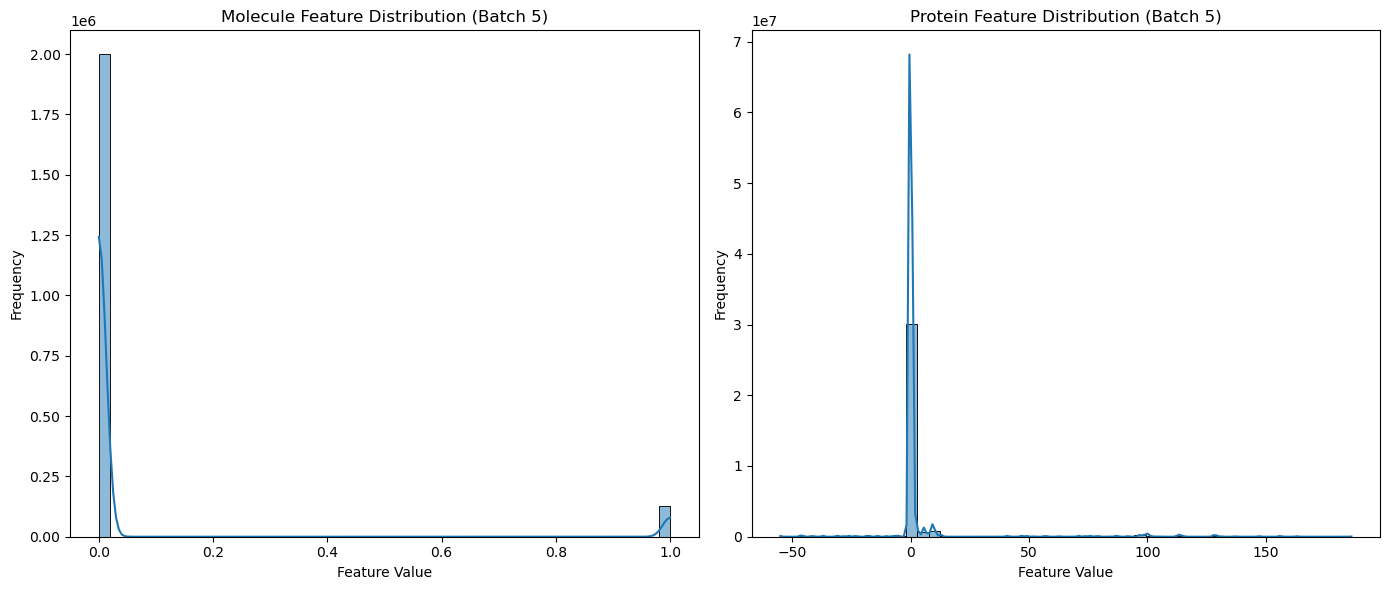

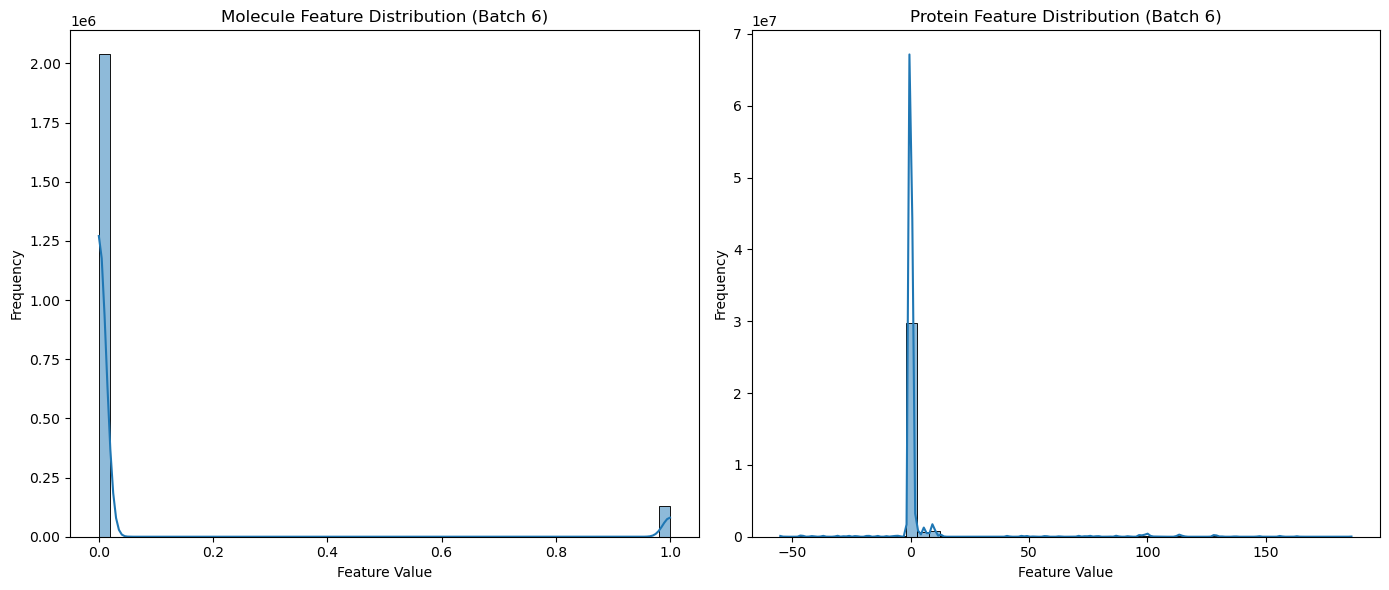

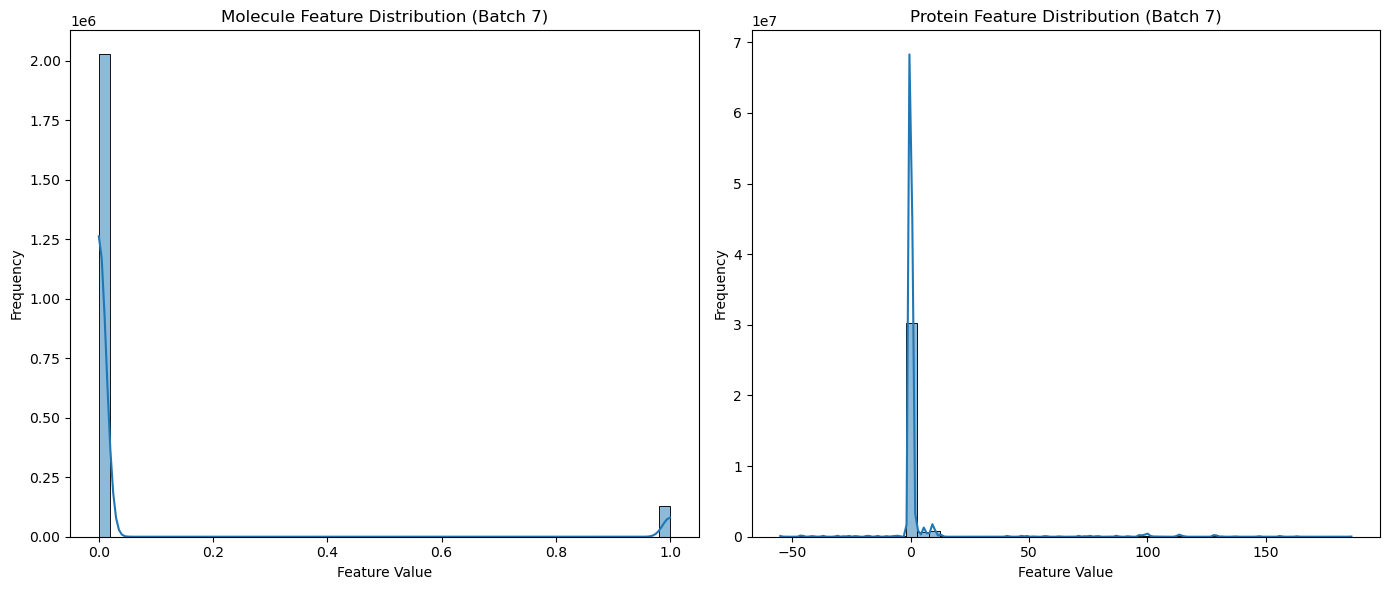

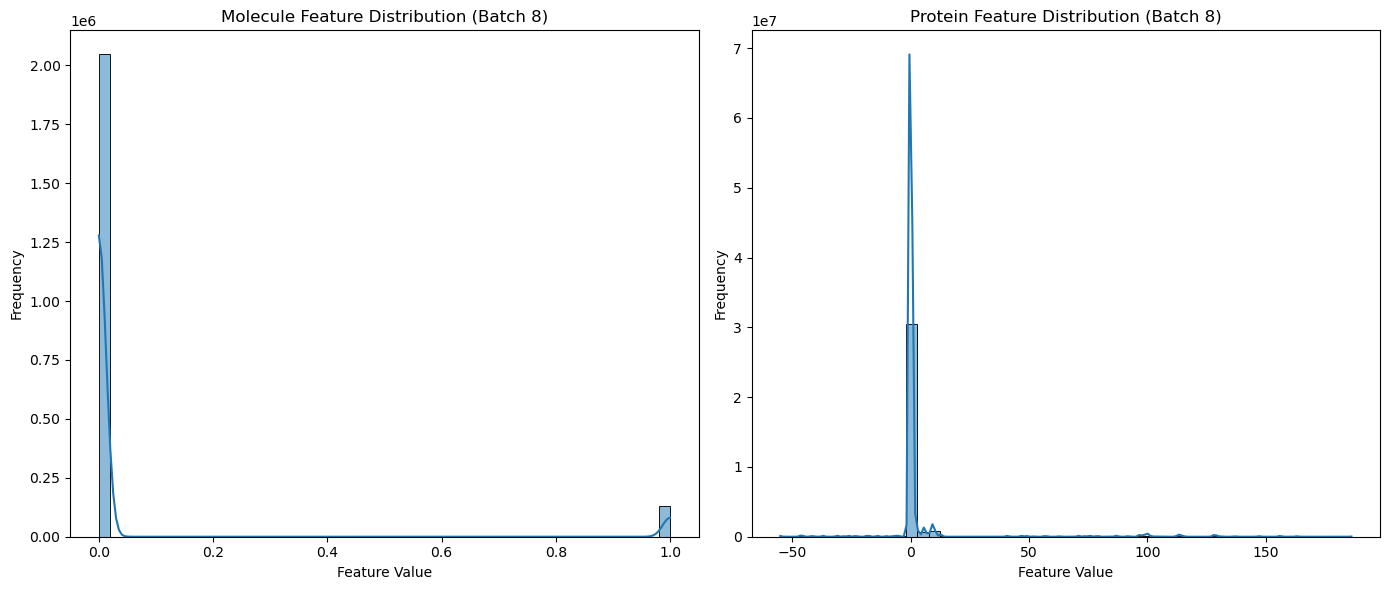

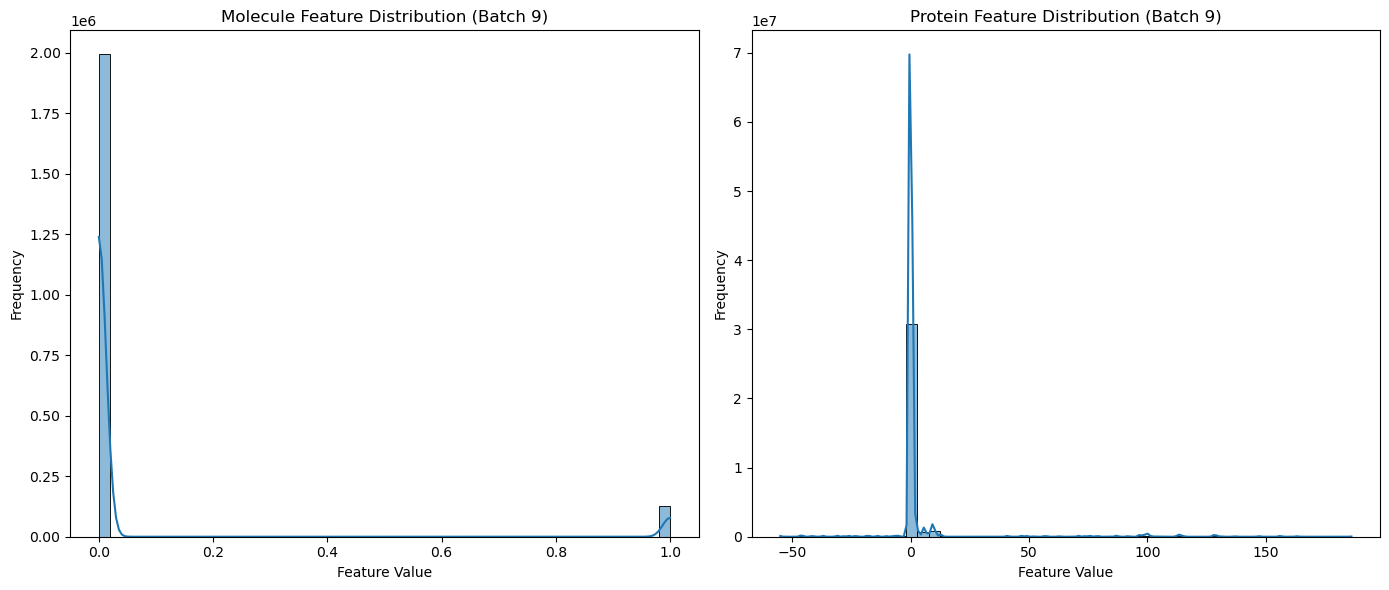

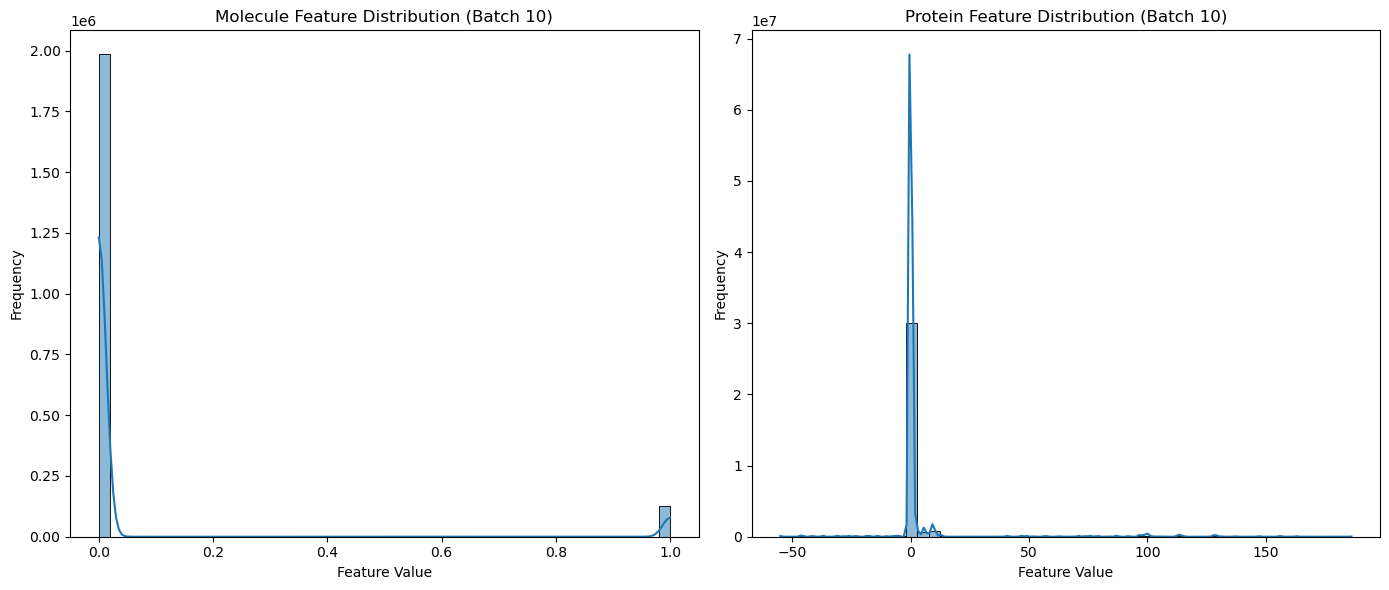

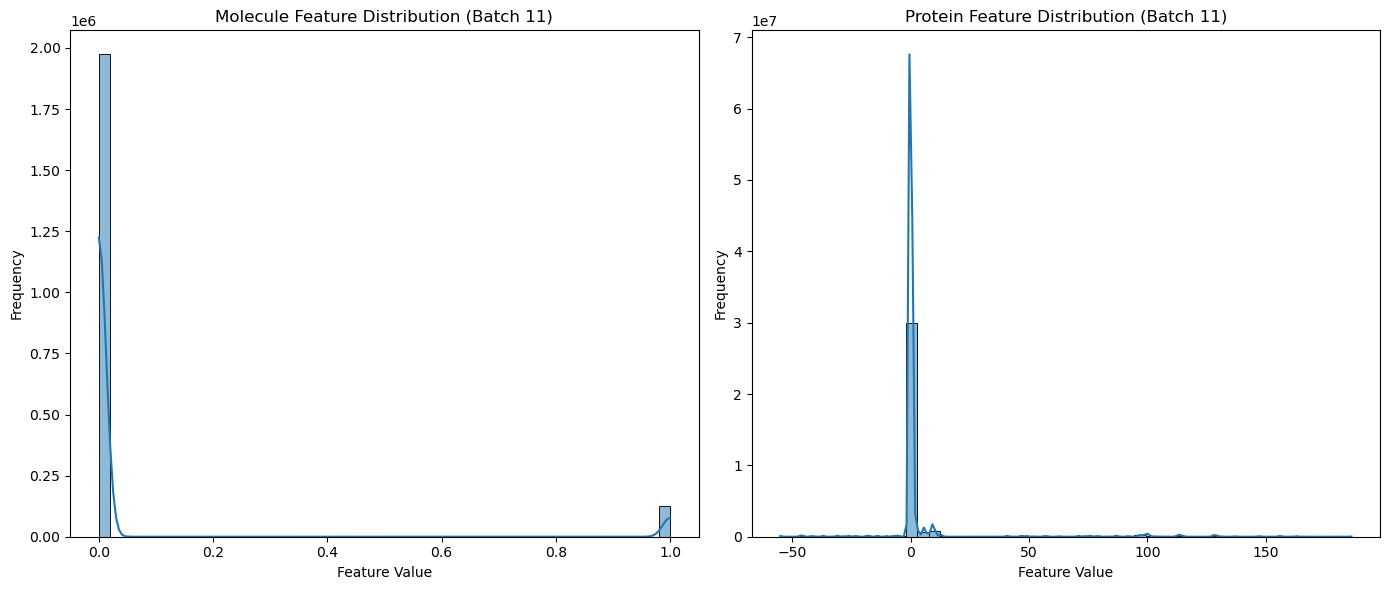

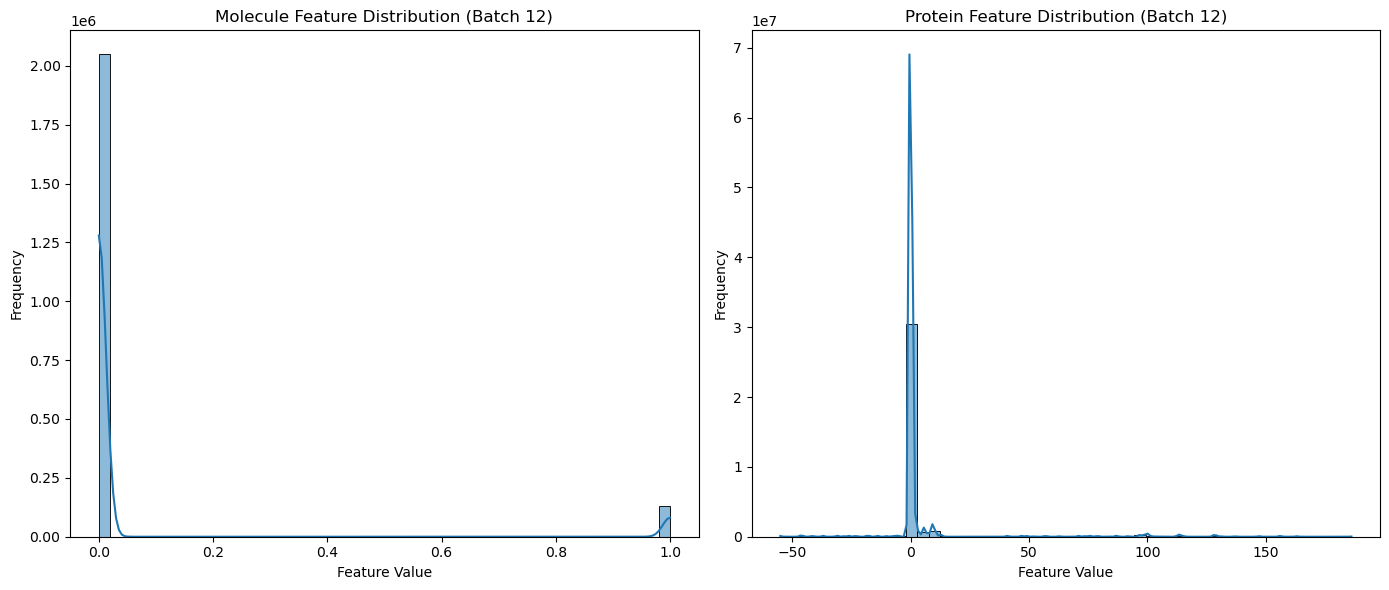

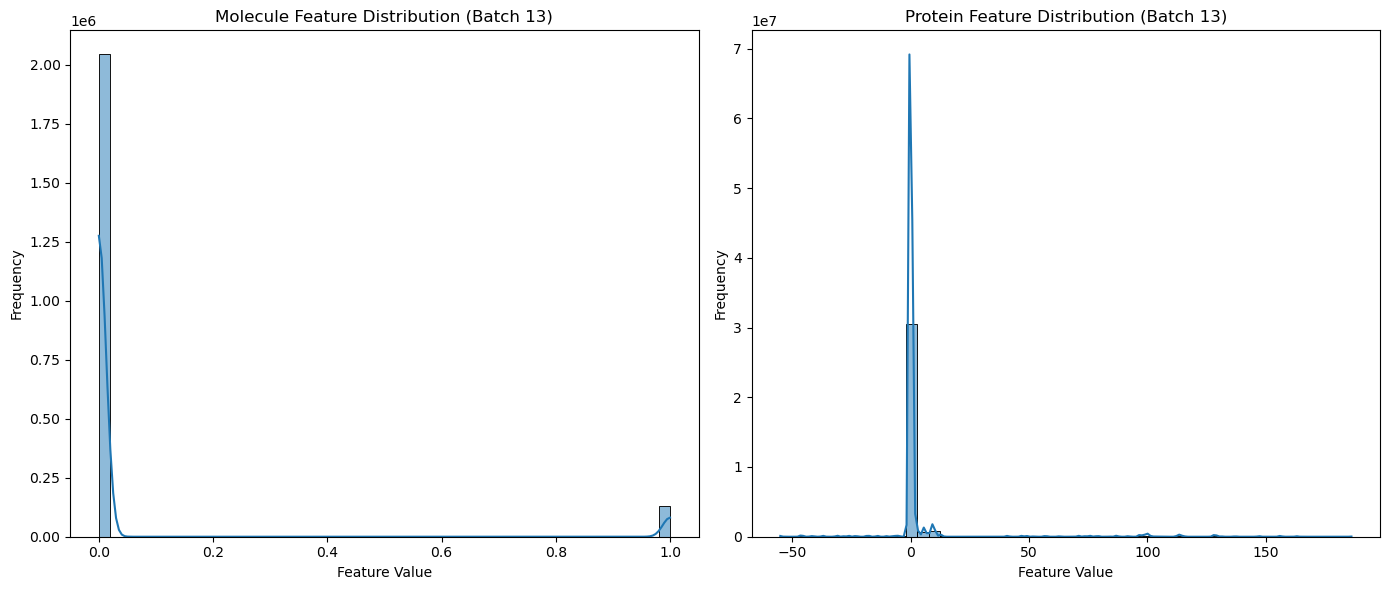

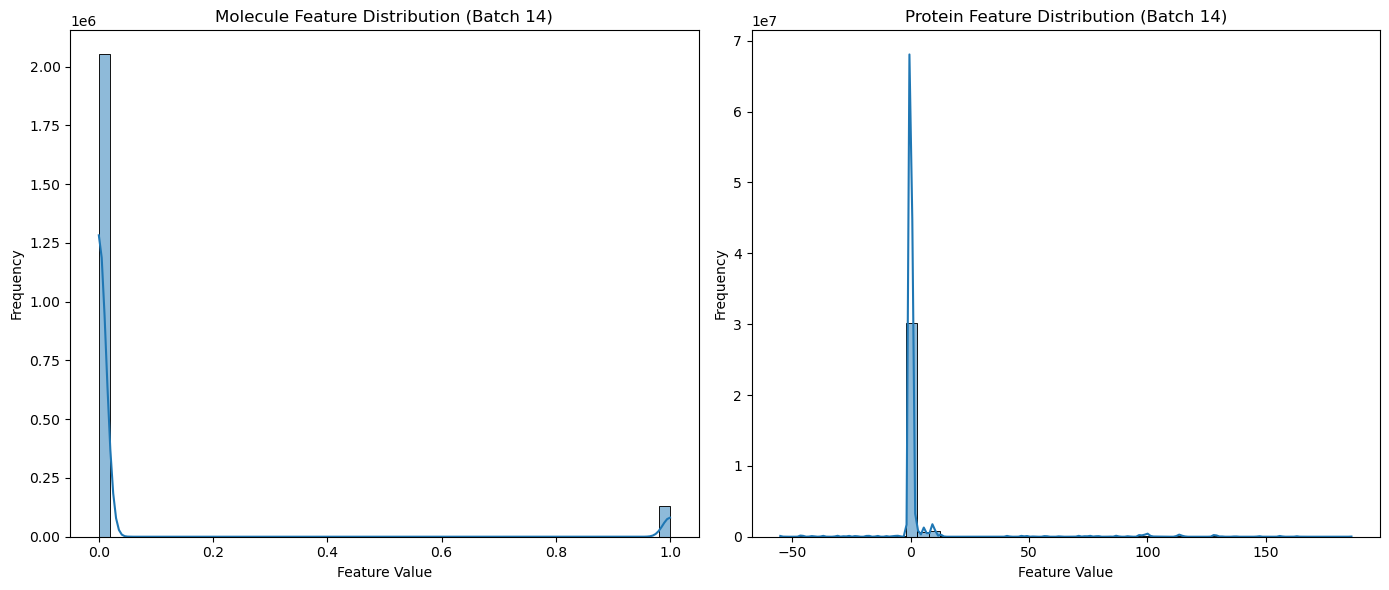

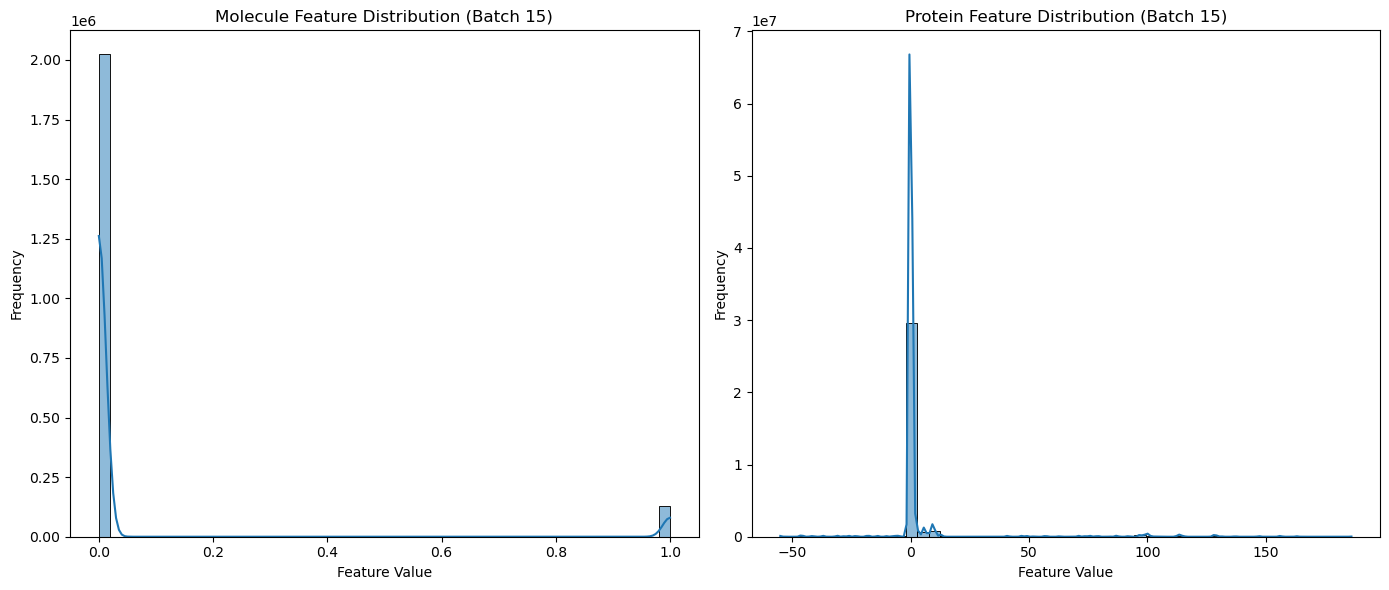

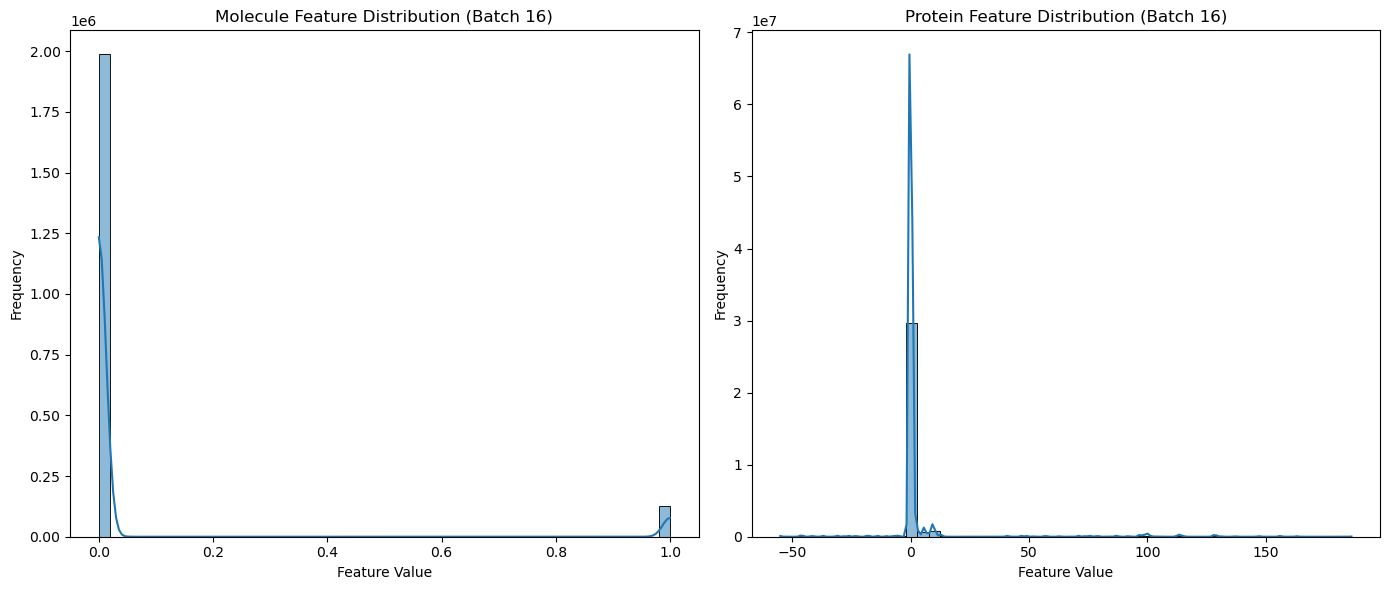

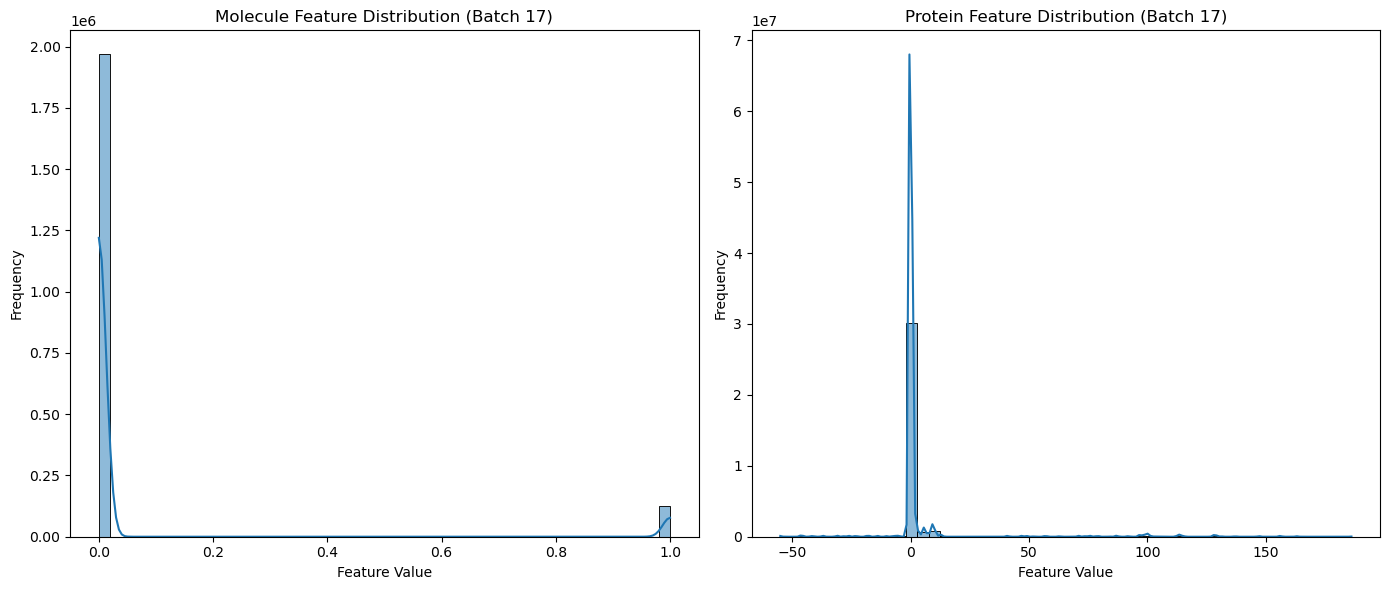

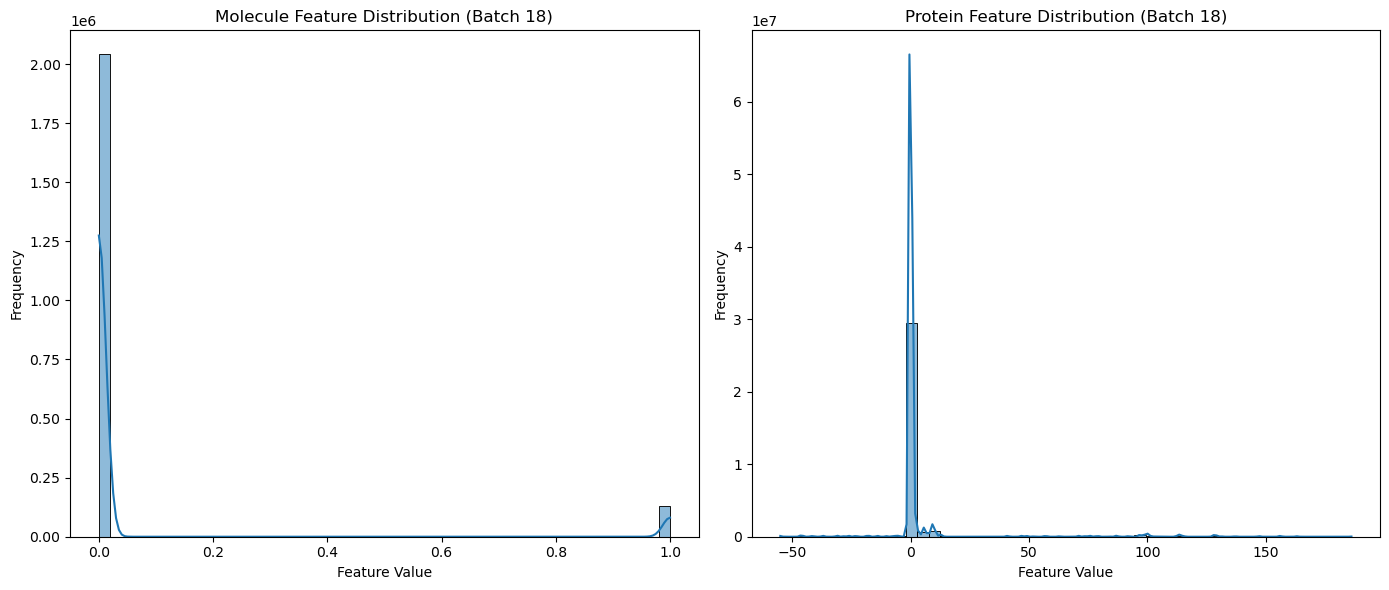

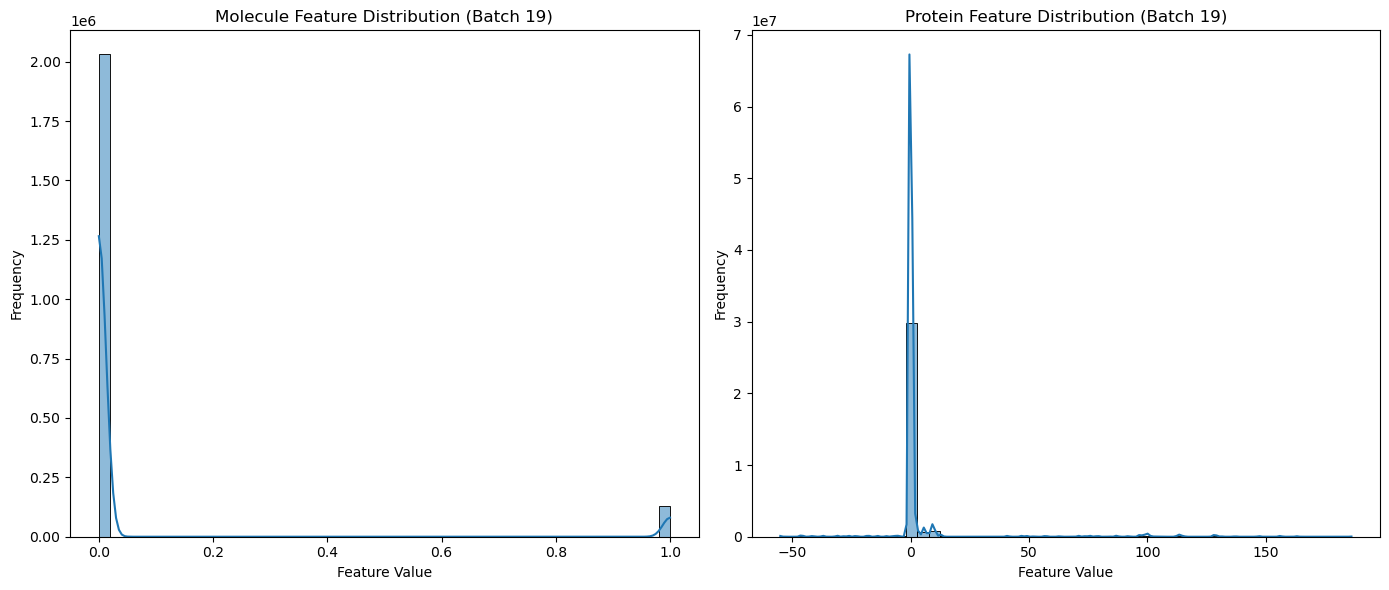

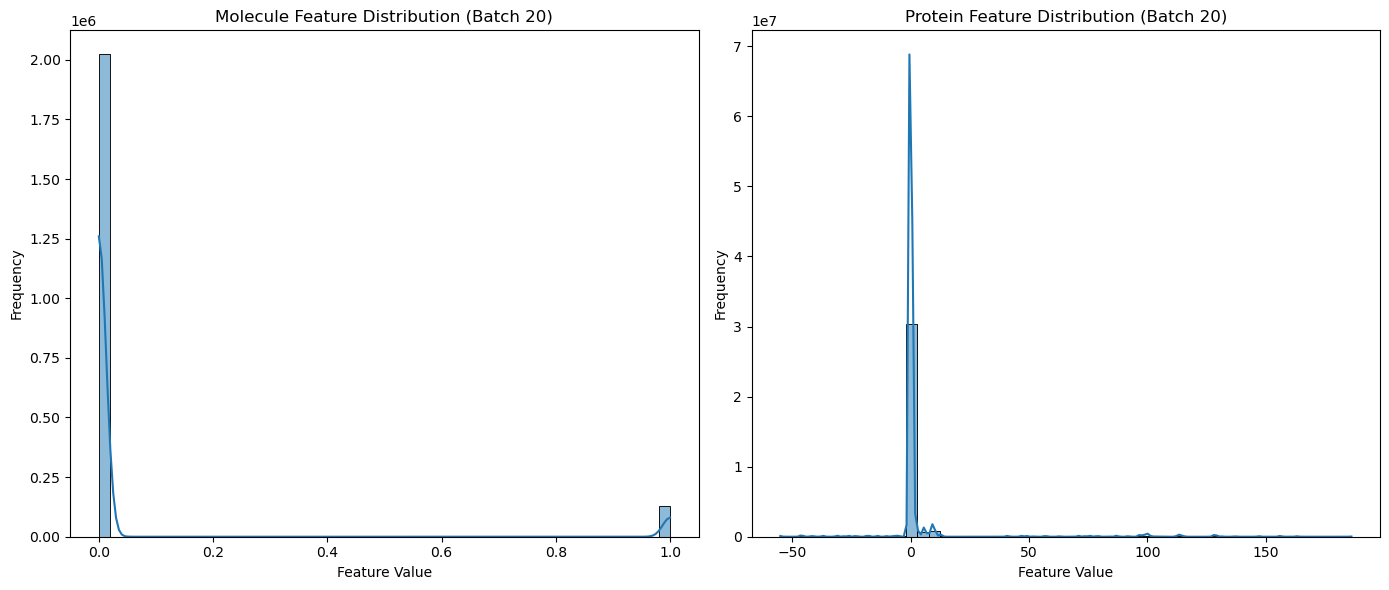

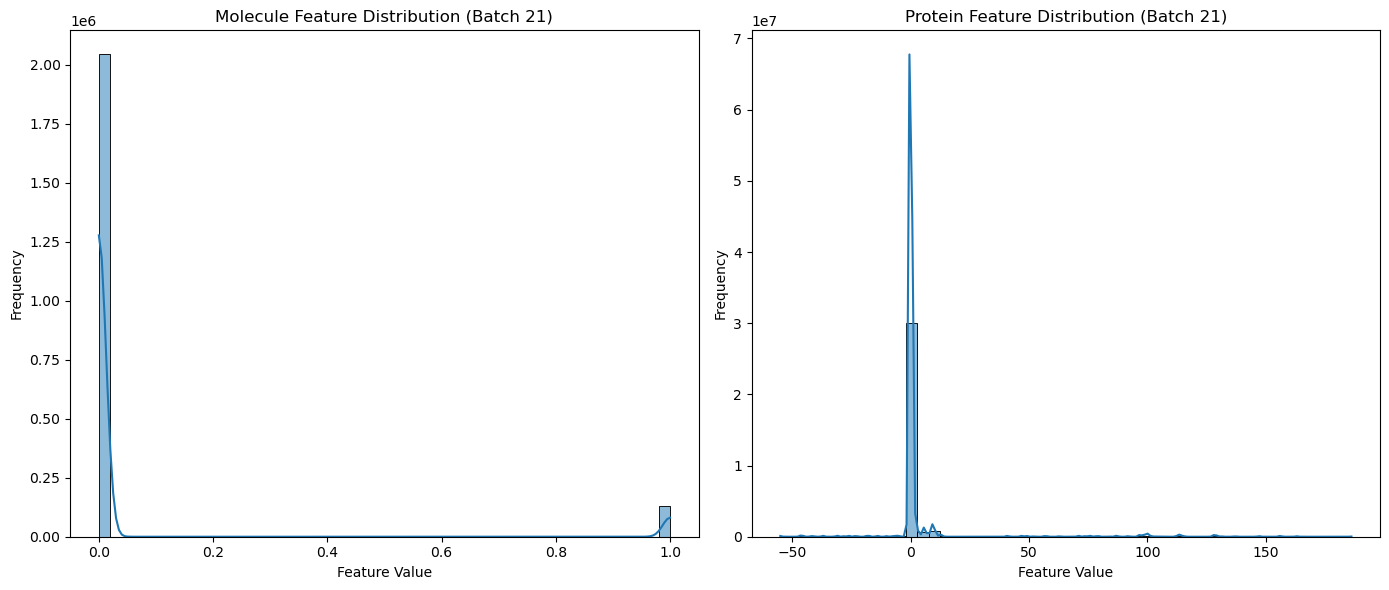

KeyboardInterrupt: 

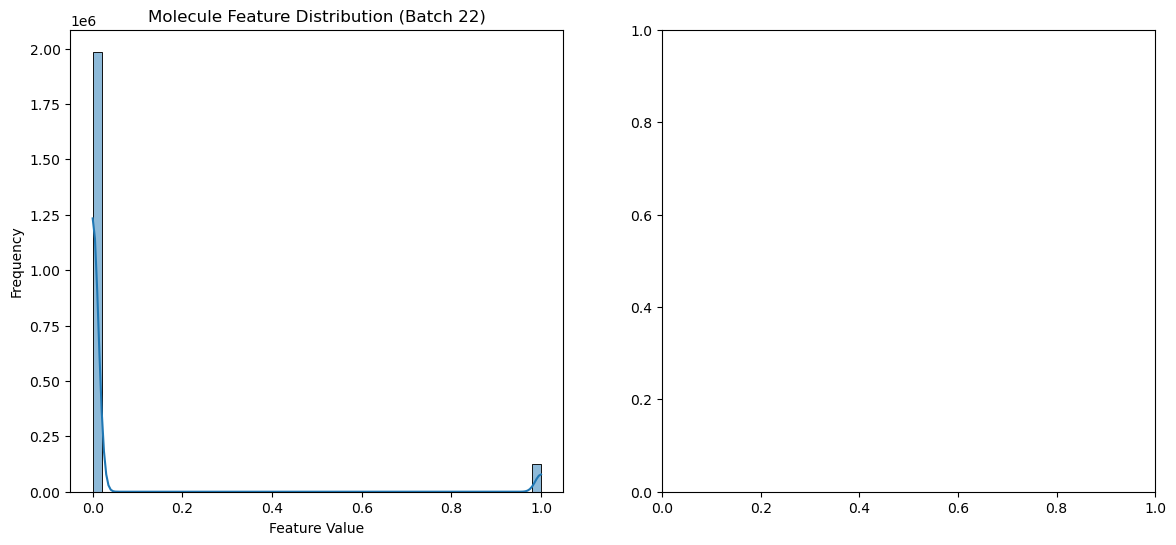

In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch_geometric.data import Data

# Define your sample directory
sample_dir = 'prepared_samples'  # Adjust this path as needed
batch_size = 1000  # Adjust batch size according to available memory

# Function to load features from a sample file
def load_features(path):
    sample = torch.load(path)
    mol_data = sample[0]
    pro_data = sample[1]
    
    # Convert dictionaries to Data objects if necessary
    if isinstance(mol_data, dict):
        mol_data = Data(**mol_data)
    if isinstance(pro_data, dict):
        pro_data = Data(**pro_data)
    
    # Ensure 'x' attribute is set for both molecule and protein data
    if not hasattr(mol_data, 'x') or mol_data.x is None:
        if hasattr(mol_data, 'features'):
            mol_data.x = mol_data.features
        else:
            raise ValueError(f"Sample at {path} mol_data has no 'x' or 'features' attribute.")
    if not hasattr(pro_data, 'x') or pro_data.x is None:
        if hasattr(pro_data, 'features'):
            pro_data.x = pro_data.features
        else:
            raise ValueError(f"Sample at {path} pro_data has no 'x' or 'features' attribute.")
    
    # Convert features to numpy if they're in tensor format
    mol_features = mol_data.x if isinstance(mol_data.x, np.ndarray) else mol_data.x.numpy()
    pro_features = pro_data.x if isinstance(pro_data.x, np.ndarray) else pro_data.x.numpy()
    
    return mol_features, pro_features

# Function to visualize the distributions of molecule and protein features in batches
def visualize_feature_distributions(sample_files, sample_dir, batch_size):
    all_mol_features = []
    all_pro_features = []
    
    for i in range(0, len(sample_files), batch_size):
        batch_files = sample_files[i:i + batch_size]
        
        # Process each file in the batch
        for file_name in batch_files:
            sample_path = os.path.join(sample_dir, file_name)
            mol_features, pro_features = load_features(sample_path)
            
            all_mol_features.extend(mol_features.ravel())  # Flatten and add to list
            all_pro_features.extend(pro_features.ravel())  # Flatten and add to list

        # Plot the batch distributions
        plt.figure(figsize=(14, 6))
        
        # Molecule features distribution
        plt.subplot(1, 2, 1)
        sns.histplot(all_mol_features, bins=50, kde=True)
        plt.title(f"Molecule Feature Distribution (Batch {i // batch_size + 1})")
        plt.xlabel("Feature Value")
        plt.ylabel("Frequency")
        
        # Protein features distribution
        plt.subplot(1, 2, 2)
        sns.histplot(all_pro_features, bins=50, kde=True)
        plt.title(f"Protein Feature Distribution (Batch {i // batch_size + 1})")
        plt.xlabel("Feature Value")
        plt.ylabel("Frequency")
        
        plt.tight_layout()
        plt.show()
        
        # Clear lists for next batch to manage memory usage
        all_mol_features.clear()
        all_pro_features.clear()

# Load the sample files and visualize distributions in batches
sample_files = [f for f in os.listdir(sample_dir) if f.endswith('.pt')]
visualize_feature_distributions(sample_files, sample_dir, batch_size)


In [ ]:
import os
import torch
import numpy as np
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the sample directory and batch size
sample_dir = 'prepared_samples'  # Adjust as needed
batch_size = 500  # Adjust batch size as needed for memory

# Function to load a single sample file and return molecule and protein features
def load_features(path):
    sample = torch.load(path)
    mol_data = sample[0]
    pro_data = sample[1]

    # Convert to Data object if needed and ensure the 'x' attribute exists
    if isinstance(mol_data, dict):
        mol_data = Data(**mol_data)
    if isinstance(pro_data, dict):
        pro_data = Data(**pro_data)

    # Check for the 'x' attribute
    mol_features = mol_data.x.numpy() if hasattr(mol_data, 'x') and mol_data.x is not None else None
    pro_features = pro_data.x.numpy() if hasattr(pro_data, 'x') and pro_data.x is not None else None

    return mol_features, pro_features

# Function to visualize feature distributions in batches
def visualize_feature_distributions(sample_files, sample_dir, batch_size=50):
    all_mol_features = []
    all_pro_features = []

    for i in range(0, len(sample_files), batch_size):
        batch_files = sample_files[i:i + batch_size]
        
        # Temporary lists to store batch data
        batch_mol_features = []
        batch_pro_features = []
        
        # Load and process each file in the batch
        for file_name in batch_files:
            sample_path = os.path.join(sample_dir, file_name)
            mol_features, pro_features = load_features(sample_path)

            # Only add non-None features to the batch lists
            if mol_features is not None:
                batch_mol_features.extend(mol_features.ravel())  # Flatten and add to batch list
            if pro_features is not None:
                batch_pro_features.extend(pro_features.ravel())  # Flatten and add to batch list
        
        # Plot batch distribution if there is data to display
        if batch_mol_features or batch_pro_features:
            plt.figure(figsize=(14, 6))
            if batch_mol_features:
                sns.histplot(batch_mol_features, kde=True, color='skyblue', label='Molecule Features (Batch)')
            if batch_pro_features:
                sns.histplot(batch_pro_features, kde=True, color='salmon', label='Protein Features (Batch)')
            plt.title(f'Feature Distribution - Batch {i // batch_size + 1}')
            plt.xlabel('Feature Value')
            plt.ylabel('Frequency')
            plt.legend()
            plt.show()
        
        # Append to overall lists for final distribution
        all_mol_features.extend(batch_mol_features)
        all_pro_features.extend(batch_pro_features)

    # Final visualization for the entire dataset
    plt.figure(figsize=(14, 6))
    if all_mol_features:
        sns.histplot(all_mol_features, kde=True, color='skyblue', label='Molecule Features (Total)')
    if all_pro_features:
        sns.histplot(all_pro_features, kde=True, color='salmon', label='Protein Features (Total)')
    plt.title('Feature Distribution - Entire Dataset')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Print summary statistics
    print("Overall Distribution Summary:")
    if all_mol_features:
        print(f"  Molecule Features - Mean: {np.mean(all_mol_features)}, Std Dev: {np.std(all_mol_features)}")
        print(f"  Molecule Features - Min: {np.min(all_mol_features)}, Max: {np.max(all_mol_features)}")
    if all_pro_features:
        print(f"  Protein Features - Mean: {np.mean(all_pro_features)}, Std Dev: {np.std(all_pro_features)}")
        print(f"  Protein Features - Min: {np.min(all_pro_features)}, Max: {np.max(all_pro_features)}")

# Execute the visualization
sample_files = [f for f in os.listdir(sample_dir) if f.endswith('.pt')]
visualize_feature_distributions(sample_files, sample_dir, batch_size=batch_size)


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
print('s')

s
